In [13]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print(f"Dataset downloaded to: {path}")

Dataset downloaded to: /home/manousos/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [14]:
import os
files = os.listdir(path)
print(f"Files in the dataset directory: {files}")       

csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)
print(f"CSV file path: {csv_path}")

Files in the dataset directory: ['Titanic-Dataset.csv', 'titanic_preprocessed.csv']
CSV file path: /home/manousos/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv


In [15]:
import pandas as pd

data = pd.read_csv(csv_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [16]:
# Handle missing values
print(data.isna().sum()) # Check for missing values
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # Fill missing 'Embarked' with mode (most frequent value)
data['Age'].fillna(data['Age'].median(), inplace=True) # Fill missing 'Age' with median age


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipykernel_7700/4179313983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # Fill missing 'Embarked' with mode (most frequent value)
/tmp/ipykernel_7700/4179313983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [17]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_cols.tolist()}")

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Cabin'] = data['Cabin'].notnull().astype(int) # Convert 'Cabin' to binary feature: 0 if missing, 1 if present
data.drop('Ticket', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
# Feature engineering:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 1
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=[0, 1, 2, 3, 4])
print(data.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    0  22.0      1      0   7.2500      0   
1            2         1       1    1  38.0      1      0  71.2833      1   
2            3         1       3    1  26.0      0      0   7.9250      0   
3            4         1       1    1  35.0      1      0  53.1000      1   
4            5         0       3    0  35.0      0      0   8.0500      0   

   Embarked  FamilySize  IsAlone AgeGroup  
0         0           2        0        2  
1         1           2        0        2  
2         0           1        1        2  
3         0           2        0        2  
4         0           1        1        2  


In [19]:
# Scale only continuous numerical features
numeric_features_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']
print(f"Numerical features: {data.select_dtypes(include=['int64', 'float64']).columns.tolist()}")
print(f"Numerical features to be scaled: {numeric_features_to_scale}")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler for standardization
data[numeric_features_to_scale] = scaler.fit_transform(data[numeric_features_to_scale])
print(data.head())

Numerical features: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone']
Numerical features to be scaled: ['Age', 'Fare', 'SibSp', 'Parch']
   PassengerId  Survived  Pclass  Sex       Age     SibSp     Parch      Fare  \
0            1         0       3    0 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1       1    1  0.663861  0.432793 -0.473674  0.786845   
2            3         1       3    1 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1    1  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3    0  0.433312 -0.474545 -0.473674 -0.486337   

   Cabin  Embarked  FamilySize  IsAlone AgeGroup  
0      0         0           2        0        2  
1      1         1           2        0        2  
2      0         0           1        1        2  
3      1         0           2        0        2  
4      0         0           1        1        

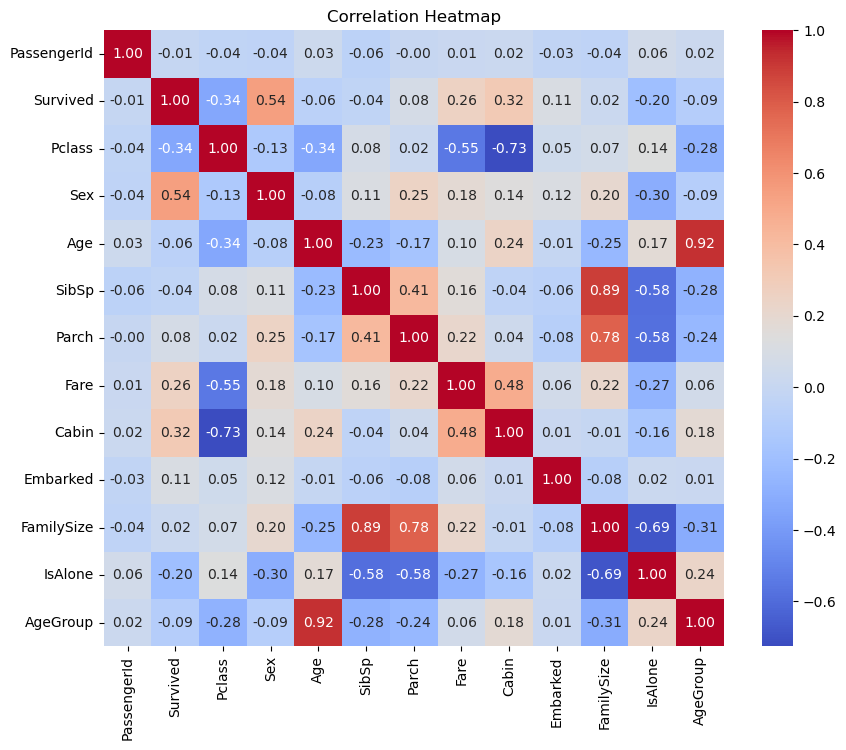

In [20]:
# Implementing EDA (Exploratory Data Analysis) to visualize data relationships and see patterns
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


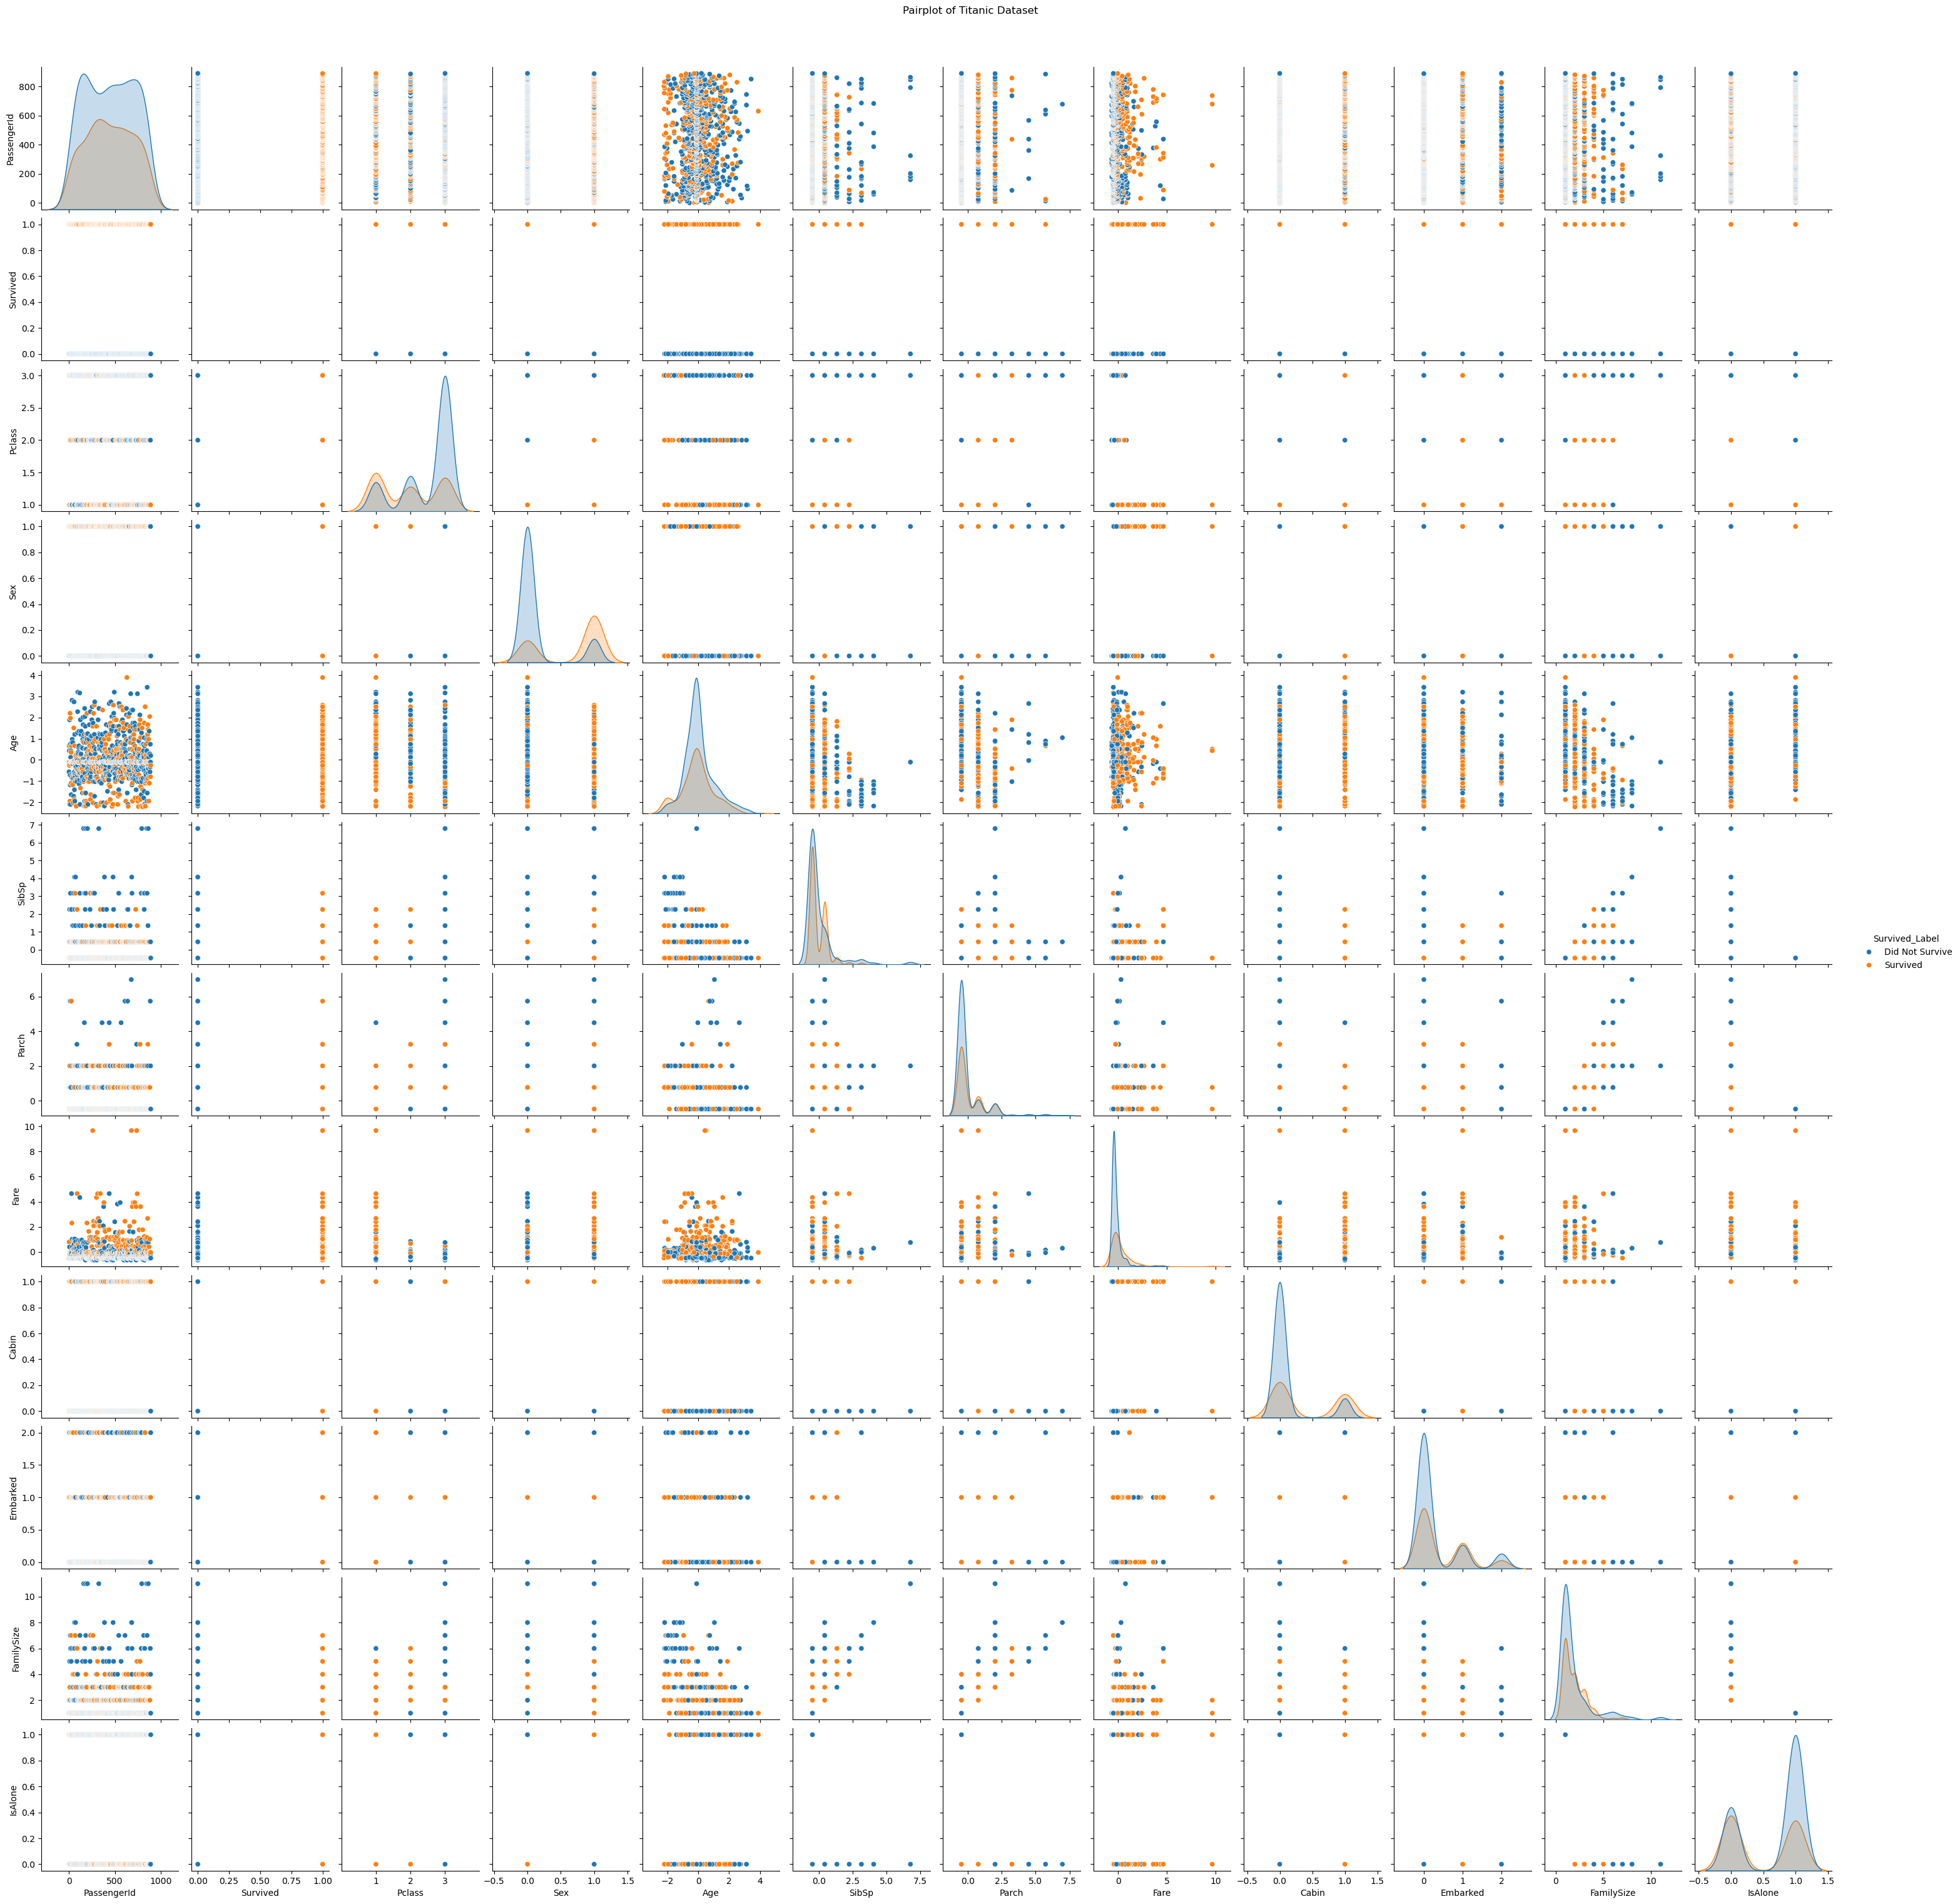

In [21]:
data["Survived_Label"] = data["Survived"].map({0: 'Did Not Survive', 1: 'Survived'})

#Pairplot to visualize relationships
sns.pairplot(data, hue='Survived_Label')
plt.suptitle("Pairplot of Titanic Dataset", y=1.02)
plt.show()


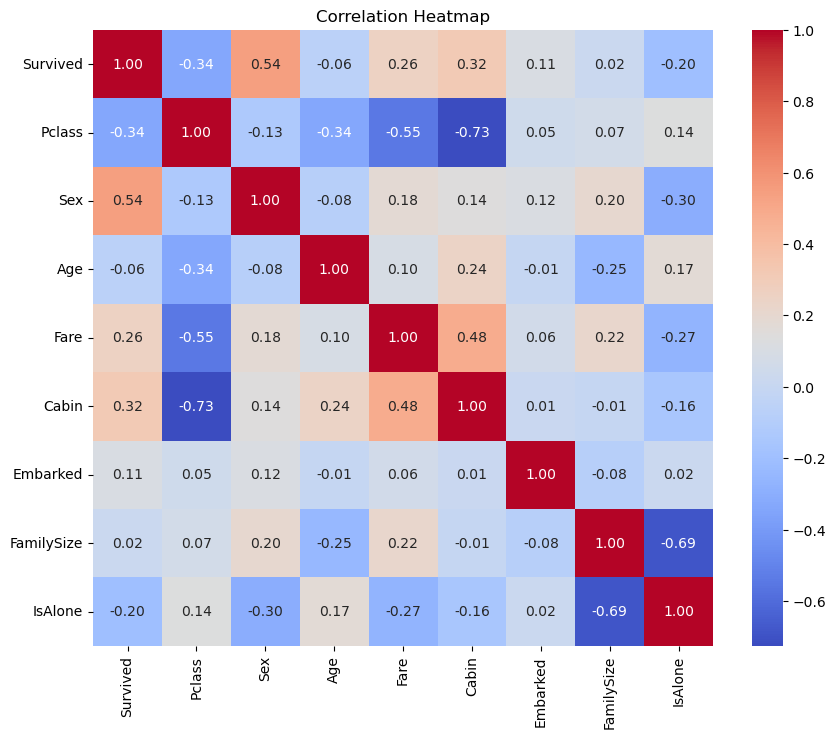

In [22]:
# I see above that the features below either do not contribute to the analysis or have been already encoded in other features (due to redundancy).

data.drop(['Survived_Label','SibSp','Parch','AgeGroup','PassengerId'], axis=1, inplace=True)
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




In [23]:
# Applying log transformation to 'Fare', 'Age', and 'FamilySize' to reduce skewness
import numpy as np

data['Fare'] = data['Fare'].apply(lambda x: np.log1p(x) if x > 0 else 0)
data['Age'] = data['Age'].apply(lambda x: np.log1p(x) if x > 0 else 0)
data['FamilySize'] = data['FamilySize'].apply(lambda x: np.log1p(x) if x > 0 else 0)



In [24]:
# Save the preprocessed data
preprocessed_path = os.path.join(path, 'titanic_preprocessed.csv')
data.to_csv(preprocessed_path, index=False)
print(f"Preprocessed data saved to: {preprocessed_path}") # Access the preprocessed data path

Preprocessed data saved to: /home/manousos/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/titanic_preprocessed.csv
